In [1]:
# create env
from simulator.maze_env import MazeEnv
from simulator.box_env import BoxEnv
from configs.str2config import str2config, add_default_argument_and_parse
import argparse
import logging
from utils.config import seed_everything
logging.basicConfig(level = logging.INFO)

/home/rainorangelemon/anaconda3/envs/ravens/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from configs.str2config import str2config, add_default_argument_and_parse
from utils.config import *
arg_parser = argparse.ArgumentParser(description="Start the experiment agent")
config_setup = add_default_argument_and_parse(arg_parser, 'experiment')
config_setup = process_config(config_setup)

 *************************************** 
The experiment name is AgentExplorerMultiAgentRegion
 *************************************** 


# Maze Environment

In [3]:
config_setup.env_name = "MazeEnv"
env = MazeEnv(config_setup)
env.init_new_problem_graph(index=0)
env.init_new_problem_instance(index=0);

Initializing Maze environment...


In [4]:
# sometimes this takes a while to run (but no more than the time_budget - 60 seconds)
# if the result is None, then it means there is no solution for this problem instance within the time budget
# in that case, run the above cell again to initialize a new problem instance
# for other planners such as our GNN planner, check expert.CBS_GNN
seed_everything(1234)
from expert.CBS import cbs, CBSPlanner
result = CBSPlanner().plan(env, env.agent_starts_vidxs, env.agent_goals_vidxs, time_budget=60)
assert result is not None, "No solution found for this problem instance"

INFO:utils.config:Global seed set to 1234
[INFO]: Global seed set to 1234


In [5]:
# this will take a while to run (about 1-5 minute)
env.render_paths_animate(result.solution, env.agent_goals_vidxs, 'figures/play_maze.gif', dpi=20)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>
[INFO]: Animation.save using <class 'matplotlib.animation.PillowWriter'>



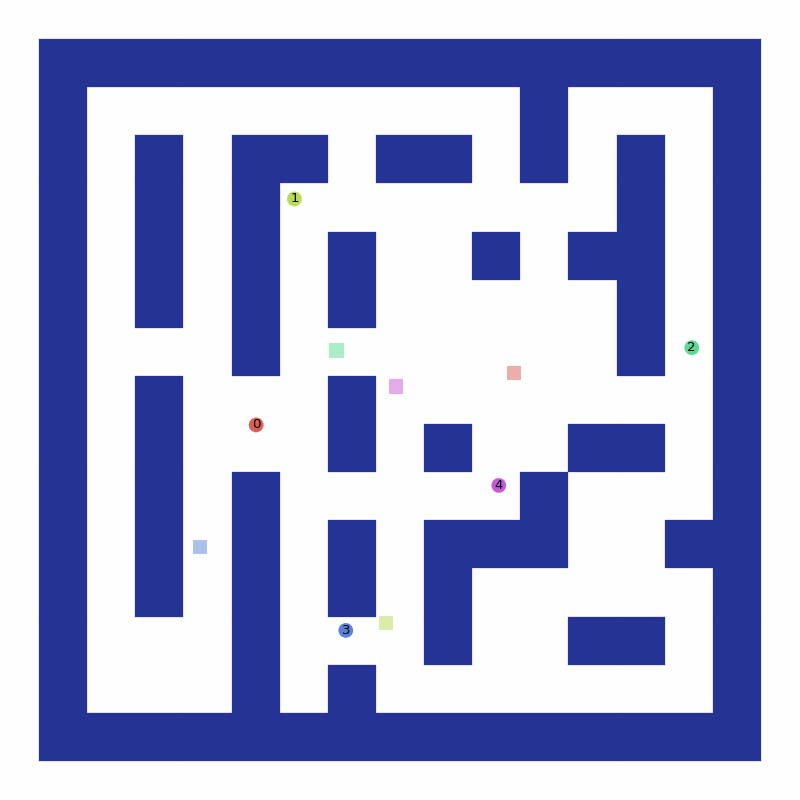

In [6]:
import base64
from IPython.display import HTML
b64 = base64.b64encode(open('figures/play_maze.gif','rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

# Box Environment

In [11]:
seed_everything(1234)
config_setup.env_name = "BoxEnv"
config_setup.num_agents = 4  # noitce that we are using 4 agents now since Box environment is more difficult
env = BoxEnv(config_setup)
env.init_new_problem_graph(index=0)
env.init_new_problem_instance(index=0);

INFO:utils.config:Global seed set to 1234
[INFO]: Global seed set to 1234


Initializing Box Environment


In [12]:
# sometimes this takes a while to run (but no more than the time_budget - 60 seconds)
# if the result is None, then it means there is no solution for this problem instance within the time budget
# in that case, run the above cell again to initialize a new problem instance
# in general, Box is harder, so it will have a higher chance to fail or find no solution
from expert.CBS import cbs, CBSPlanner
result = CBSPlanner().plan(env, env.agent_starts_vidxs, env.agent_goals_vidxs, time_budget=60)
assert result is not None, "No solution found for this problem instance"

In [13]:
# this will take a while to run (about 1-5 minute)
env.render_paths_animate(result.solution, env.agent_goals_vidxs, 'figures/play_box.gif', dpi=20)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>
[INFO]: Animation.save using <class 'matplotlib.animation.PillowWriter'>



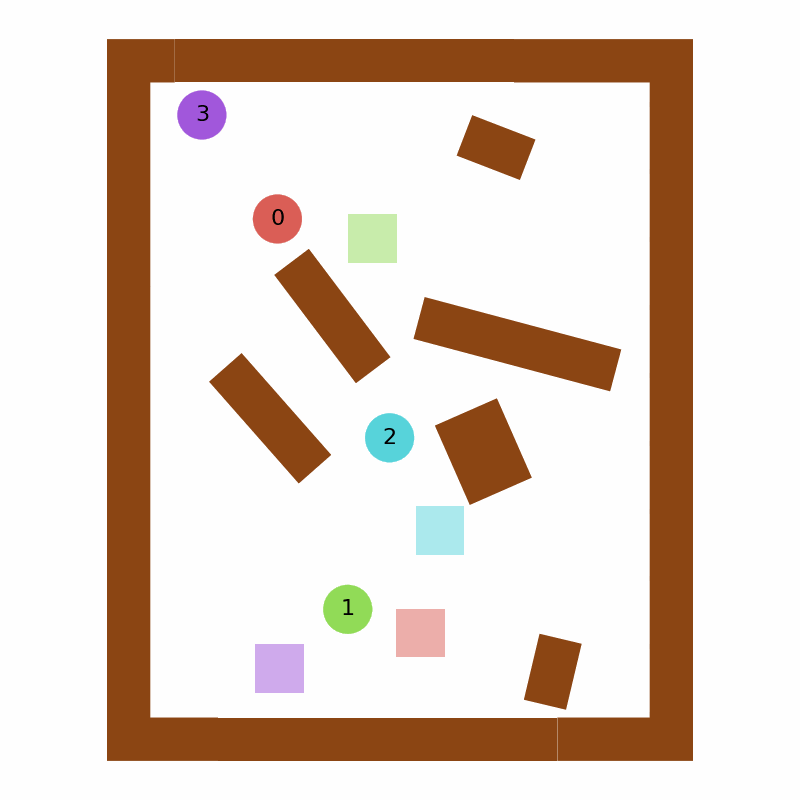

In [14]:
import base64
from IPython.display import HTML
b64 = base64.b64encode(open('figures/play_box.gif','rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))